# Data Understanding

In [1]:
# Must be included at the beginning of each new notebook. Remember to change the app name.
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('BDAS').getOrCreate()

In [2]:
# Schemas can only be inferred for CSV files. 
dataset = spark.read.csv('suicide rates_dataset.csv', inferSchema=True, header=True)
dataset.printSchema() 

root
 |-- country: string (nullable = true)
 |-- year: integer (nullable = true)
 |-- sex: string (nullable = true)
 |-- age: string (nullable = true)
 |-- suicides_no: integer (nullable = true)
 |-- population: integer (nullable = true)
 |-- suicides/100k pop: double (nullable = true)
 |-- country-year: string (nullable = true)
 |-- HDI for year: double (nullable = true)
 |-- gdp_for_year ($): string (nullable = true)
 |-- gdp_per_capita ($): integer (nullable = true)
 |-- generation: string (nullable = true)



In [8]:
# Let's get a better look at the data.
# We know that we can show a DataFrame, but that's resulted in a mess! 
dataset.show()

+-------+----+------+-----------+-----------+----------+-----------------+------------+------------+----------------+------------------+---------------+
|country|year|   sex|        age|suicides_no|population|suicides/100k pop|country-year|HDI for year|gdp_for_year ($)|gdp_per_capita ($)|     generation|
+-------+----+------+-----------+-----------+----------+-----------------+------------+------------+----------------+------------------+---------------+
|Albania|1987|  male|15-24 years|         21|    312900|             6.71| Albania1987|        null|  -2,138,342,396|               796|   Generation X|
|Albania|1987|  male|35-54 years|         16|    308000|             5.19| Albania1987|        null|  -2,138,342,396|               796|         Silent|
|Albania|1987|female|15-24 years|         14|    289700|             4.83| Albania1987|        null|  -2,138,342,396|               796|   Generation X|
|Albania|1987|  male|  75+ years|          1|     21800|             4.59| Albania

In [9]:
print((dataset.count(), len(dataset.columns)))

(27820, 12)


In [10]:
dataset.describe().show()

+-------+----------+------------------+------+-----------+------------------+------------------+------------------+--------------+-------------------+----------------+------------------+----------+
|summary|   country|              year|   sex|        age|       suicides_no|        population| suicides/100k pop|  country-year|       HDI for year|gdp_for_year ($)|gdp_per_capita ($)|generation|
+-------+----------+------------------+------+-----------+------------------+------------------+------------------+--------------+-------------------+----------------+------------------+----------+
|  count|     27820|             27820| 27820|      27820|             27820|             27820|             27820|         27820|               8364|           27820|             27820|     27820|
|   mean|      null|2001.2583752695903|  null|       null|242.57440690150972|1844793.6173975556|12.816097411933894|          null| 0.7766011477761785|            null|16866.464414090584|      null|
| stddev| 

In [3]:
dataset.dtypes

[('country', 'string'),
 ('year', 'int'),
 ('sex', 'string'),
 ('age', 'string'),
 ('suicides_no', 'int'),
 ('population', 'int'),
 ('suicides/100k pop', 'double'),
 ('country-year', 'string'),
 ('HDI for year', 'double'),
 ('gdp_for_year ($)', 'string'),
 ('gdp_per_capita ($)', 'int'),
 ('generation', 'string')]

In [3]:
# for some basic operatios
import numpy as np 
import pandas as pd 

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
!sudo apt-get install python-matplotlib

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages were automatically installed and are no longer required:
  linux-aws-headers-4.4.0-1062 linux-aws-headers-4.4.0-1065
  linux-headers-4.4.0-1062-aws linux-headers-4.4.0-1065-aws
  linux-image-4.4.0-1062-aws linux-image-4.4.0-1065-aws
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  blt fonts-lyx javascript-common libblas-common libblas3 libgfortran3
  libglade2-0 libjs-jquery libjs-jquery-ui liblapack3 libpython-stdlib
  libpython2.7-minimal libpython2.7-stdlib libtcl8.6 libtk8.6 libwebp5
  libwebpmux1 libxft2 libxss1 python python-cairo python-cycler
  python-dateutil python-glade2 python-gobject-2 python-gtk2 python-imaging
  python-matplotlib-data python-minimal python-numpy python-pil
  python-pyparsing python-six python-tk python-tz python2.7 python2.7-minimal
  tk8.6-blt2.5 ttf-bitstream-vera
Suggested packages:
  bl

In [24]:
!pip3 install seaborn

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 216 kB 10.7 MB/s eta 0:00:01
  Using cached scipy-1.4.1-cp35-cp35m-manylinux1_x86_64.whl (26.0 MB)


In [22]:
!pip3 install --upgrade pip

    100% |████████████████████████████████| 1.5MB 891kB/s eta 0:00:01    19% |██████▏                         | 286kB 18.5MB/s eta 0:00:01


In [26]:
dataset.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year', 'gdp_for_year ($)',
       'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [29]:
dataset.head()

Row(country='Albania', year=1987, sex='male', age='15-24 years', suicides_no=21, population=312900, suicides/100k pop=6.71, country-year='Albania1987', HDI for year=None, gdp_for_year ($)='-2,138,342,396', gdp_per_capita ($)=796, generation='Generation X')

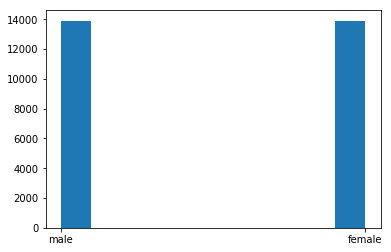

In [35]:
# Convert sex to an array using Numpy and plot it using pyplot. 
sexArr = np.array(dataset.select('sex').collect())
plt.hist(sexArr)
plt.show()

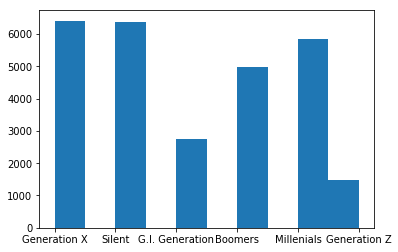

In [36]:
generationArr = np.array(dataset.select('generation').collect())
plt.hist(generationArr)
plt.show()

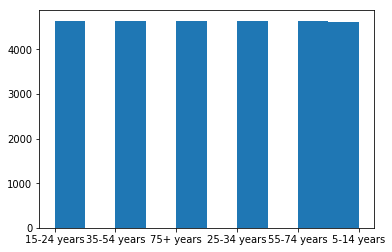

In [37]:
ageArr = np.array(dataset.select('age').collect())
plt.hist(ageArr)
plt.show()

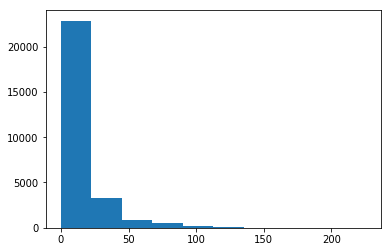

In [41]:
targetArr = np.array(dataset.select('suicides/100k pop').collect())
plt.hist(targetArr)
plt.show()

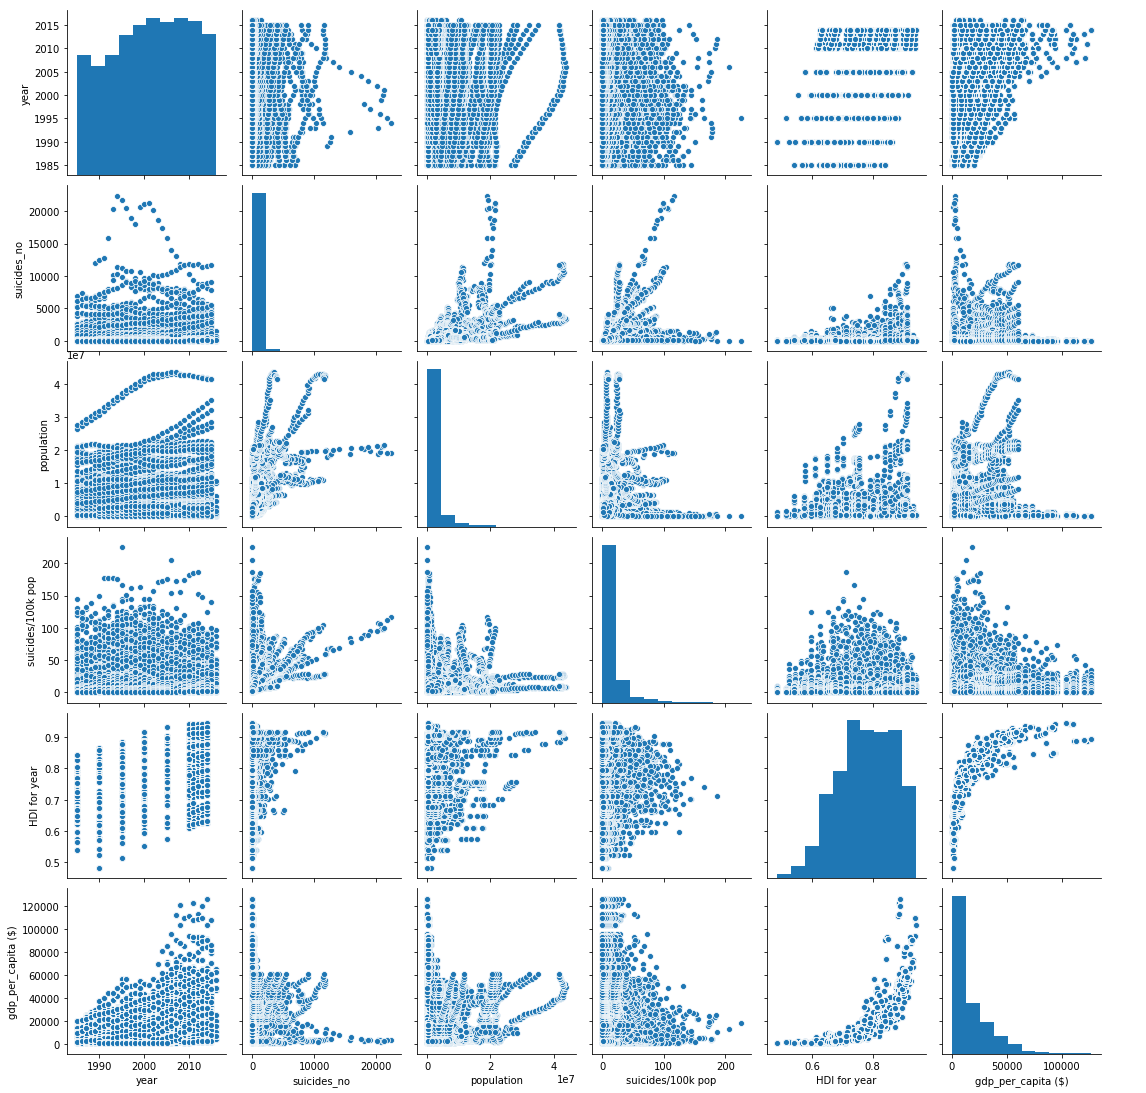

In [22]:
dataset=dataset.toPandas()
sns.pairplot(dataset)

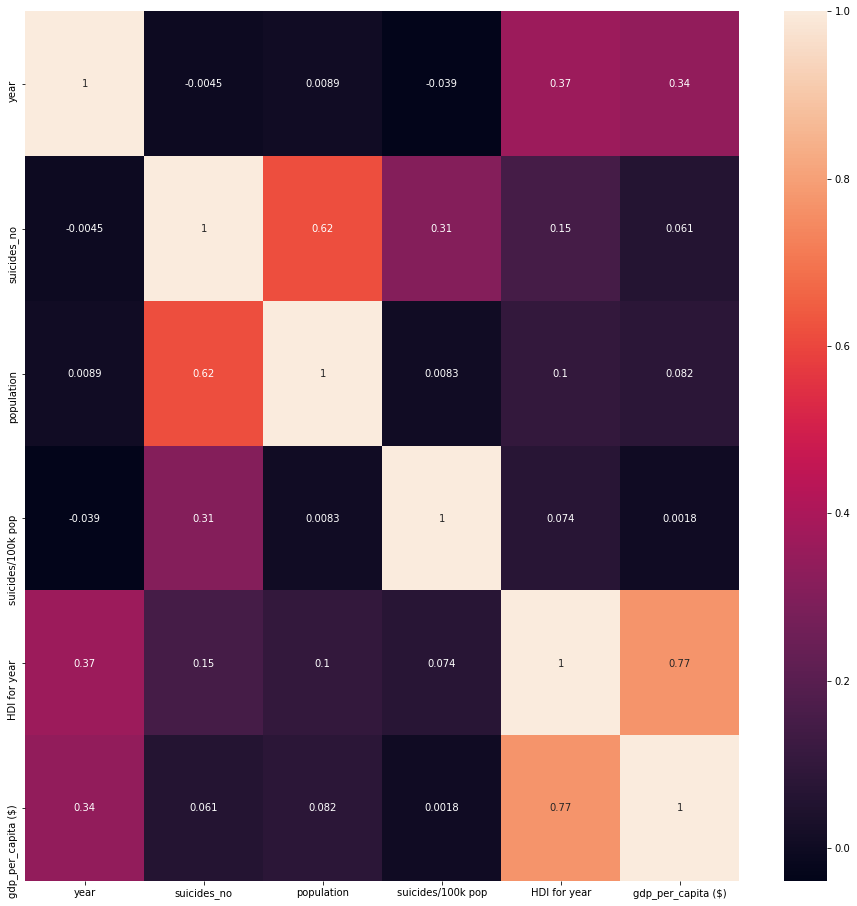

In [29]:
plt.figure(figsize=(16,16))
cor = sns.heatmap(dataset.corr(), annot = True)
plt.show()

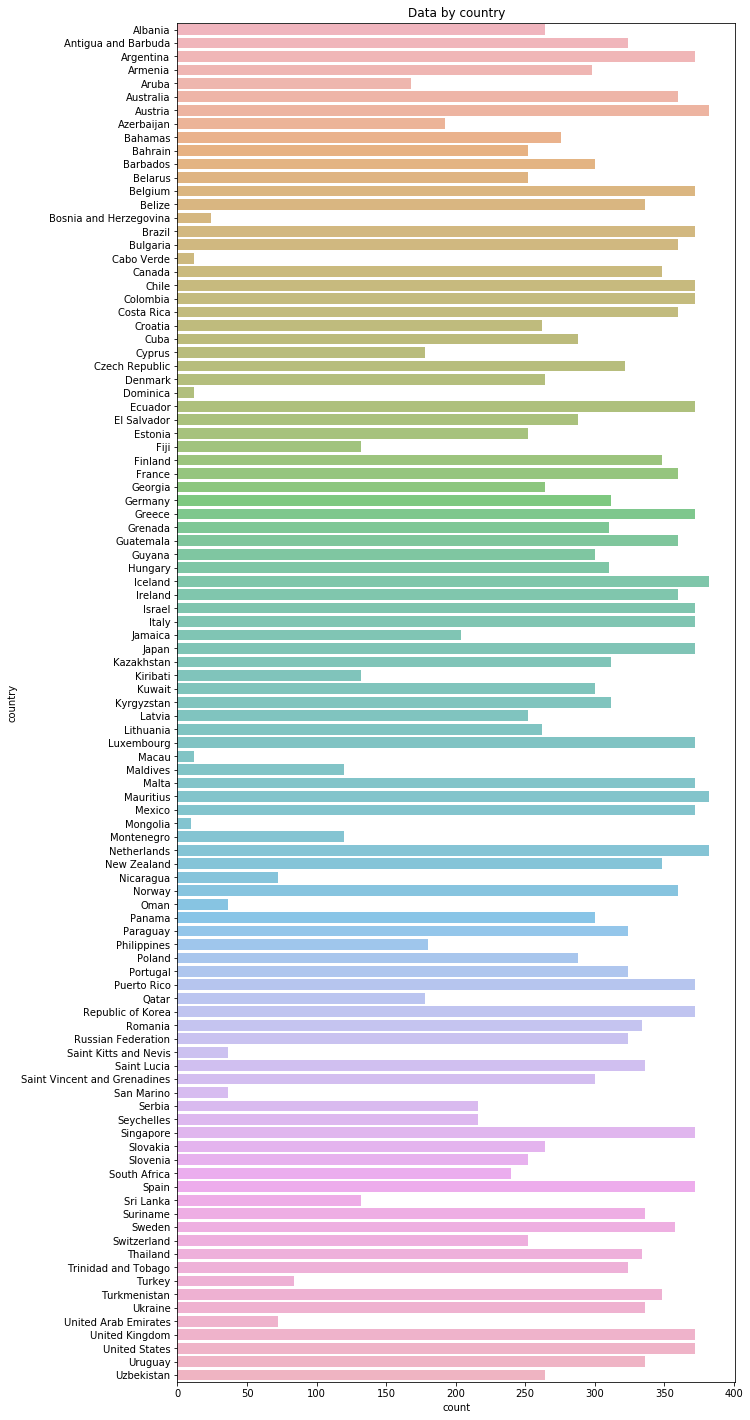

In [25]:
alpha = 0.7
plt.figure(figsize=(10,25))
sns.countplot(y='country', data=dataset, alpha=alpha)
plt.title('Data by country')
plt.show()

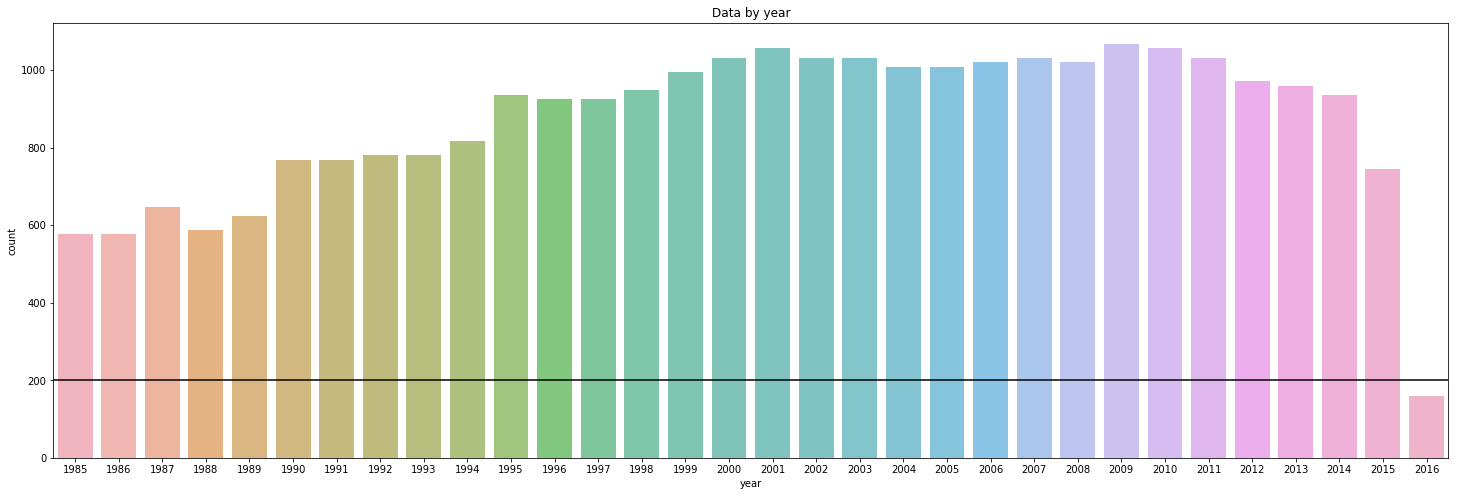

In [26]:
plt.figure(figsize=(25,8))
sns.countplot(x='year', data=dataset, alpha=alpha)
plt.title('Data by year')
plt.axhline(y=200, color='k')
plt.show()

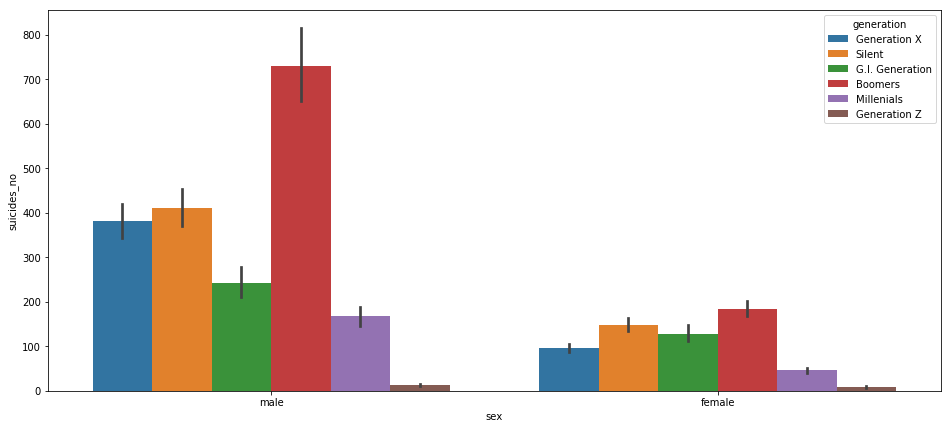

In [27]:
plt.figure(figsize=(16,7))
bar_gen = sns.barplot(x = 'sex', y = 'suicides_no', hue = 'generation',data = dataset)

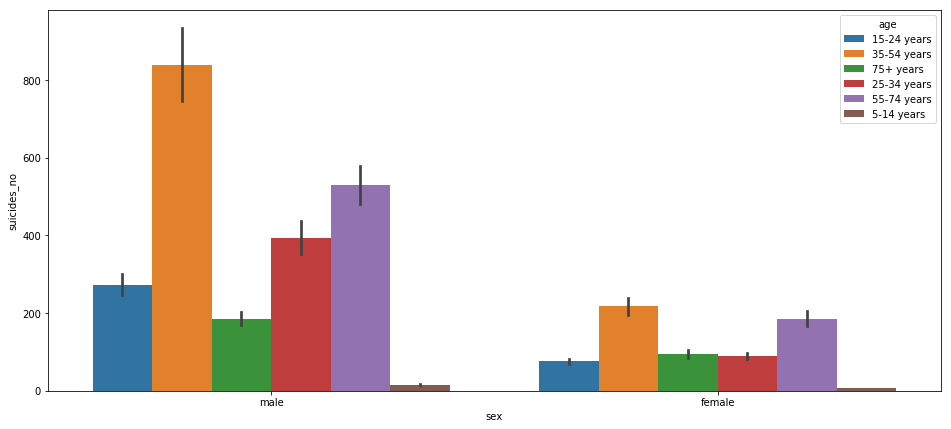

In [28]:
plt.figure(figsize=(16,7))
bar_age = sns.barplot(x = 'sex', y = 'suicides_no', hue = 'age',data = dataset)

In [44]:
# We can also select various columns from a DataFrame. 
dataset.select('HDI for year').show()

+------------+
|HDI for year|
+------------+
|        null|
|        null|
|        null|
|        null|
|        null|
|        null|
|        null|
|        null|
|        null|
|        null|
|        null|
|        null|
|        null|
|        null|
|        null|
|        null|
|        null|
|        null|
|        null|
|        null|
+------------+
only showing top 20 rows



In [48]:
### Get count of both null and missing values in pyspark

from pyspark.sql.functions import isnan, when, count, col

dataset.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in dataset.columns]).show()

+-------+----+---+---+-----------+----------+-----------------+------------+------------+----------------+------------------+----------+
|country|year|sex|age|suicides_no|population|suicides/100k pop|country-year|HDI for year|gdp_for_year ($)|gdp_per_capita ($)|generation|
+-------+----+---+---+-----------+----------+-----------------+------------+------------+----------------+------------------+----------+
|      0|   0|  0|  0|          0|         0|                0|           0|       19456|               0|                 0|         0|
+-------+----+---+---+-----------+----------+-----------------+------------+------------+----------------+------------------+----------+



In [49]:
### Get count of missing and null values of single column in pyspark
 
from pyspark.sql.functions import isnan, when, count, col

dataset.select([count(when(isnan('HDI for year') | col('HDI for year').isNull() , True))]).show()

+------------------------------------------------------------------------------+
|count(CASE WHEN (isnan(HDI for year) OR (HDI for year IS NULL)) THEN true END)|
+------------------------------------------------------------------------------+
|                                                                         19456|
+------------------------------------------------------------------------------+



# Data preparation

In [50]:
dataset.select("country-year").distinct().show()

+--------------------+
|        country-year|
+--------------------+
|         Denmark2015|
|         Grenada2011|
|         Ireland1993|
|          Kuwait2000|
|           Malta1995|
|       Mauritius2014|
|          Poland2010|
|        Thailand1991|
|Trinidad and Toba...|
|         Ukraine2014|
|         Armenia1990|
|         Austria1987|
|         Austria1999|
|        Barbados2007|
|         Finland2006|
|         Grenada2003|
|         Jamaica1988|
|           Japan1998|
|          Kuwait2008|
|      Luxembourg1988|
+--------------------+
only showing top 20 rows



In [4]:
columns_to_drop = ['country-year']
select_data = dataset.drop(*columns_to_drop)

In [9]:
select_data.columns

['country',
 'year',
 'sex',
 'age',
 'suicides_no',
 'population',
 'suicides/100k pop',
 'HDI for year',
 'gdp_for_year ($)',
 'gdp_per_capita ($)',
 'generation']

In [11]:
print((select_data.count(), len(select_data.columns)))

(27820, 11)


In [12]:
### Get count of both null and missing values in pyspark

from pyspark.sql.functions import isnan, when, count, col

select_data.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in select_data.columns]).show()

+-------+----+---+---+-----------+----------+-----------------+------------+----------------+------------------+----------+
|country|year|sex|age|suicides_no|population|suicides/100k pop|HDI for year|gdp_for_year ($)|gdp_per_capita ($)|generation|
+-------+----+---+---+-----------+----------+-----------------+------------+----------------+------------------+----------+
|      0|   0|  0|  0|          0|         0|                0|       19456|               0|                 0|         0|
+-------+----+---+---+-----------+----------+-----------------+------------+----------------+------------------+----------+



In [13]:
### Get count of missing and null values of single column in pyspark
 
from pyspark.sql.functions import isnan, when, count, col

select_data.select([count(when(isnan('HDI for year') | col('HDI for year').isNull() , True))]).show()

+------------------------------------------------------------------------------+
|count(CASE WHEN (isnan(HDI for year) OR (HDI for year IS NULL)) THEN true END)|
+------------------------------------------------------------------------------+
|                                                                         19456|
+------------------------------------------------------------------------------+



In [5]:
columns_to_drop = ['HDI for year']
clean_data = select_data.drop(*columns_to_drop)

In [17]:
clean_data.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in clean_data.columns]).show()

+-------+----+---+---+-----------+----------+-----------------+----------------+------------------+----------+
|country|year|sex|age|suicides_no|population|suicides/100k pop|gdp_for_year ($)|gdp_per_capita ($)|generation|
+-------+----+---+---+-----------+----------+-----------------+----------------+------------------+----------+
|      0|   0|  0|  0|          0|         0|                0|               0|                 0|         0|
+-------+----+---+---+-----------+----------+-----------------+----------------+------------------+----------+



In [13]:
clean_data.dtypes

[('country', 'string'),
 ('year', 'int'),
 ('sex', 'string'),
 ('age', 'string'),
 ('suicides_no', 'int'),
 ('population', 'int'),
 ('suicides/100k pop', 'double'),
 ('gdp_for_year ($)', 'string'),
 ('gdp_per_capita ($)', 'int'),
 ('generation', 'string')]

In [14]:
clean_data.select("gdp_for_year ($)").show()

+----------------+
|gdp_for_year ($)|
+----------------+
|  -2,138,342,396|
|  -2,138,342,396|
|  -2,138,342,396|
|  -2,138,342,396|
|  -2,138,342,396|
|  -2,138,342,396|
|  -2,138,342,396|
|  -2,138,342,396|
|  -2,138,342,396|
|  -2,138,342,396|
|  -2,138,342,396|
|  -2,138,342,396|
|   2,126,000,000|
|   2,126,000,000|
|   2,126,000,000|
|   2,126,000,000|
|   2,126,000,000|
|   2,126,000,000|
|   2,126,000,000|
|   2,126,000,000|
+----------------+
only showing top 20 rows



In [7]:
import pyspark.sql.functions as f

new=clean_data.select("gdp_for_year ($)", f.regexp_replace(f.col("gdp_for_year ($)"), "[\$#,]", "").alias("GDP ($)"))
new.show()

+----------------+-----------+
|gdp_for_year ($)|    GDP ($)|
+----------------+-----------+
|  -2,138,342,396|-2138342396|
|  -2,138,342,396|-2138342396|
|  -2,138,342,396|-2138342396|
|  -2,138,342,396|-2138342396|
|  -2,138,342,396|-2138342396|
|  -2,138,342,396|-2138342396|
|  -2,138,342,396|-2138342396|
|  -2,138,342,396|-2138342396|
|  -2,138,342,396|-2138342396|
|  -2,138,342,396|-2138342396|
|  -2,138,342,396|-2138342396|
|  -2,138,342,396|-2138342396|
|   2,126,000,000| 2126000000|
|   2,126,000,000| 2126000000|
|   2,126,000,000| 2126000000|
|   2,126,000,000| 2126000000|
|   2,126,000,000| 2126000000|
|   2,126,000,000| 2126000000|
|   2,126,000,000| 2126000000|
|   2,126,000,000| 2126000000|
+----------------+-----------+
only showing top 20 rows



In [8]:
import pyspark.sql.functions as f

construct_data=clean_data.withColumn("GDP ($)",f.regexp_replace(f.col("gdp_for_year ($)"), "[\$#,]", ""))
construct_data.dtypes

[('country', 'string'),
 ('year', 'int'),
 ('sex', 'string'),
 ('age', 'string'),
 ('suicides_no', 'int'),
 ('population', 'int'),
 ('suicides/100k pop', 'double'),
 ('gdp_for_year ($)', 'string'),
 ('gdp_per_capita ($)', 'int'),
 ('generation', 'string'),
 ('GDP ($)', 'string')]

In [9]:
from pyspark.sql.types import IntegerType
construct_data = construct_data.withColumn("GDP ($)", construct_data["GDP ($)"].cast(IntegerType()))
construct_data.dtypes

[('country', 'string'),
 ('year', 'int'),
 ('sex', 'string'),
 ('age', 'string'),
 ('suicides_no', 'int'),
 ('population', 'int'),
 ('suicides/100k pop', 'double'),
 ('gdp_for_year ($)', 'string'),
 ('gdp_per_capita ($)', 'int'),
 ('generation', 'string'),
 ('GDP ($)', 'int')]

In [10]:
construct_data.select("GDP ($)").show()

+-----------+
|    GDP ($)|
+-----------+
|-2138342396|
|-2138342396|
|-2138342396|
|-2138342396|
|-2138342396|
|-2138342396|
|-2138342396|
|-2138342396|
|-2138342396|
|-2138342396|
|-2138342396|
|-2138342396|
| 2126000000|
| 2126000000|
| 2126000000|
| 2126000000|
| 2126000000|
| 2126000000|
| 2126000000|
| 2126000000|
+-----------+
only showing top 20 rows



In [11]:
columns_to_drop = ['gdp_for_year ($)']
construct_data = construct_data.drop(*columns_to_drop)

In [15]:
construct_data.columns

['country',
 'year',
 'sex',
 'age',
 'suicides_no',
 'population',
 'suicides/100k pop',
 'gdp_per_capita ($)',
 'generation',
 'GDP ($)']

In [17]:
from  pyspark.sql.functions import abs

construct_data2 = construct_data.withColumn('GDP_for_year ($)',abs(construct_data["GDP ($)"]))
construct_data2.select("GDP_for_year ($)").show()

+----------------+
|GDP_for_year ($)|
+----------------+
|      2138342396|
|      2138342396|
|      2138342396|
|      2138342396|
|      2138342396|
|      2138342396|
|      2138342396|
|      2138342396|
|      2138342396|
|      2138342396|
|      2138342396|
|      2138342396|
|      2126000000|
|      2126000000|
|      2126000000|
|      2126000000|
|      2126000000|
|      2126000000|
|      2126000000|
|      2126000000|
+----------------+
only showing top 20 rows



In [19]:
construct_data2.dtypes

[('country', 'string'),
 ('year', 'int'),
 ('sex', 'string'),
 ('age', 'string'),
 ('suicides_no', 'int'),
 ('population', 'int'),
 ('suicides/100k pop', 'double'),
 ('gdp_per_capita ($)', 'int'),
 ('generation', 'string'),
 ('GDP ($)', 'int'),
 ('GDP_for_year ($)', 'int')]

In [20]:
columns_to_drop = ['GDP ($)']
construct_data2 = construct_data2.drop(*columns_to_drop)
construct_data2.columns

['country',
 'year',
 'sex',
 'age',
 'suicides_no',
 'population',
 'suicides/100k pop',
 'gdp_per_capita ($)',
 'generation',
 'GDP_for_year ($)']

In [21]:
construct_data2.select("GDP_for_year ($)").show()

+----------------+
|GDP_for_year ($)|
+----------------+
|      2138342396|
|      2138342396|
|      2138342396|
|      2138342396|
|      2138342396|
|      2138342396|
|      2138342396|
|      2138342396|
|      2138342396|
|      2138342396|
|      2138342396|
|      2138342396|
|      2126000000|
|      2126000000|
|      2126000000|
|      2126000000|
|      2126000000|
|      2126000000|
|      2126000000|
|      2126000000|
+----------------+
only showing top 20 rows



In [22]:
construct_data2.show()

+-------+----+------+-----------+-----------+----------+-----------------+------------------+---------------+----------------+
|country|year|   sex|        age|suicides_no|population|suicides/100k pop|gdp_per_capita ($)|     generation|GDP_for_year ($)|
+-------+----+------+-----------+-----------+----------+-----------------+------------------+---------------+----------------+
|Albania|1987|  male|15-24 years|         21|    312900|             6.71|               796|   Generation X|      2138342396|
|Albania|1987|  male|35-54 years|         16|    308000|             5.19|               796|         Silent|      2138342396|
|Albania|1987|female|15-24 years|         14|    289700|             4.83|               796|   Generation X|      2138342396|
|Albania|1987|  male|  75+ years|          1|     21800|             4.59|               796|G.I. Generation|      2138342396|
|Albania|1987|  male|25-34 years|          9|    274300|             3.28|               796|        Boomers|  

In [23]:
construct_data2.dtypes

[('country', 'string'),
 ('year', 'int'),
 ('sex', 'string'),
 ('age', 'string'),
 ('suicides_no', 'int'),
 ('population', 'int'),
 ('suicides/100k pop', 'double'),
 ('gdp_per_capita ($)', 'int'),
 ('generation', 'string'),
 ('GDP_for_year ($)', 'int')]

In [5]:
construct_data2.toPandas().to_csv('data_integration.csv')

In [5]:
data_integration = spark.read.csv('data_integration.csv', inferSchema=True, header=True)
data_integration.printSchema() 
print((data_integration.count(), len(data_integration.columns)))

root
 |-- country: string (nullable = true)
 |-- year: integer (nullable = true)
 |-- sex: string (nullable = true)
 |-- age: string (nullable = true)
 |-- suicides_no: integer (nullable = true)
 |-- population: integer (nullable = true)
 |-- suicides/100k pop: double (nullable = true)
 |-- gdp_per_capita ($): integer (nullable = true)
 |-- generation: string (nullable = true)
 |-- GDP_for_year ($): integer (nullable = true)

(27820, 10)


In [7]:
data_integration.select("GDP_for_year ($)").show()

+----------------+
|GDP_for_year ($)|
+----------------+
|      2138342396|
|      2138342396|
|      2138342396|
|      2138342396|
|      2138342396|
|      2138342396|
|      2138342396|
|      2138342396|
|      2138342396|
|      2138342396|
|      2138342396|
|      2138342396|
|      2126000000|
|      2126000000|
|      2126000000|
|      2126000000|
|      2126000000|
|      2126000000|
|      2126000000|
|      2126000000|
+----------------+
only showing top 20 rows



In [6]:
data_integration = data_integration.toPandas()

print("country: ", data_integration["country"].unique())
print("sex: ", data_integration["sex"].unique())
print("age: ", data_integration["age"].unique())
print("generation: ", data_integration["generation"].unique())

country:  ['Albania' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia'
 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Barbados' 'Belarus' 'Belgium'
 'Belize' 'Bosnia and Herzegovina' 'Brazil' 'Bulgaria' 'Cabo Verde'
 'Canada' 'Chile' 'Colombia' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus'
 'Czech Republic' 'Denmark' 'Dominica' 'Ecuador' 'El Salvador' 'Estonia'
 'Fiji' 'Finland' 'France' 'Georgia' 'Germany' 'Greece' 'Grenada'
 'Guatemala' 'Guyana' 'Hungary' 'Iceland' 'Ireland' 'Israel' 'Italy'
 'Jamaica' 'Japan' 'Kazakhstan' 'Kiribati' 'Kuwait' 'Kyrgyzstan' 'Latvia'
 'Lithuania' 'Luxembourg' 'Macau' 'Maldives' 'Malta' 'Mauritius' 'Mexico'
 'Mongolia' 'Montenegro' 'Netherlands' 'New Zealand' 'Nicaragua' 'Norway'
 'Oman' 'Panama' 'Paraguay' 'Philippines' 'Poland' 'Portugal'
 'Puerto Rico' 'Qatar' 'Republic of Korea' 'Romania' 'Russian Federation'
 'Saint Kitts and Nevis' 'Saint Lucia' 'Saint Vincent and Grenadines'
 'San Marino' 'Serbia' 'Seychelles' 'Singapore' 'Slovakia' 'Slovenia

In [12]:
# import the necessary module
from sklearn import preprocessing
# create the LabelEncoder object
le = preprocessing.LabelEncoder()
# convert the categorical columns into numeric 
data_integration['country'] = le.fit_transform(data_integration['country'])
data_integration['sex'] = le.fit_transform(data_integration['sex'])
data_integration['age'] = le.fit_transform(data_integration['age'])
data_integration['generation'] = le.fit_transform(data_integration['generation'])

data_integration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 10 columns):
country               27820 non-null int64
year                  27820 non-null int64
sex                   27820 non-null int64
age                   27820 non-null int64
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null int64
GDP_for_year ($)      27820 non-null int64
dtypes: float64(1), int64(9)
memory usage: 2.1 MB


In [11]:
!pip install scikit-spark

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 65 kB 5.3 MB/s  eta 0:00:01


In [13]:
print("country: ", data_integration["country"].unique())
print("sex: ", data_integration["sex"].unique())
print("age: ", data_integration["age"].unique())
print("generation: ", data_integration["generation"].unique())

country:  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100]
sex:  [1 0]
age:  [0 2 5 1 4 3]
generation:  [2 5 1 0 4 3]


In [14]:
data_integration.to_csv("prepared_data.csv")

# Data transformation

In [27]:
prepared_data = spark.read.csv('prepared_data.csv', inferSchema=True, header=True)
prepared_data.printSchema() 
print((prepared_data.count(), len(prepared_data.columns)))

root
 |-- country: integer (nullable = true)
 |-- year: integer (nullable = true)
 |-- sex: integer (nullable = true)
 |-- age: integer (nullable = true)
 |-- suicides_no: integer (nullable = true)
 |-- population: integer (nullable = true)
 |-- suicides/100k pop: double (nullable = true)
 |-- gdp_per_capita ($): integer (nullable = true)
 |-- generation: integer (nullable = true)
 |-- GDP_for_year ($): integer (nullable = true)

(27820, 10)


In [28]:
import six
for i in prepared_data.columns:
    if not(isinstance(prepared_data.select(i).take(1)[0][0], six.string_types)):
        print("Correlation to suicide rates for ", i, prepared_data.stat.corr('suicides/100k pop',i))

Correlation to suicide rates for  country 0.05522414101938743
Correlation to suicide rates for  year -0.03903679721784211
Correlation to suicide rates for  sex 0.3914964657601513
Correlation to suicide rates for  age 0.18721462224225474
Correlation to suicide rates for  suicides_no 0.30660445126778024
Correlation to suicide rates for  population 0.008284973053478566
Correlation to suicide rates for  suicides/100k pop 1.0
Correlation to suicide rates for  gdp_per_capita ($) 0.0017851337973437866
Correlation to suicide rates for  generation -0.049820069680553185
Correlation to suicide rates for  GDP_for_year ($) 0.004306072685032865


In [20]:
columns_to_drop = ['suicides_no','population']
reduce_data = prepared_data.drop(*columns_to_drop)
reduce_data.columns

['country',
 'year',
 'sex',
 'age',
 'suicides/100k pop',
 'gdp_per_capita ($)',
 'generation',
 'GDP_for_year ($)']

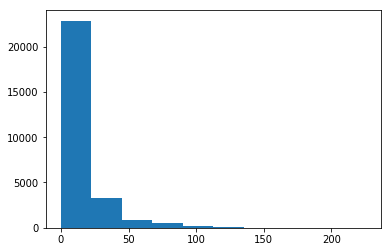

In [17]:
targetArr = np.array(prepared_data.select('suicides/100k pop').collect())
plt.hist(targetArr)
plt.show()

In [27]:
from pyspark.sql.functions import col
from pyspark.sql.functions import log

project_data = reduce_data.withColumn("log_rate", log(col("suicides/100k pop")+1))
project_data.columns

['country',
 'year',
 'sex',
 'age',
 'suicides/100k pop',
 'gdp_per_capita ($)',
 'generation',
 'GDP_for_year ($)',
 'log_rate']

In [30]:
project_data.select("suicides/100k pop","log_rate").show()

+-----------------+------------------+
|suicides/100k pop|          log_rate|
+-----------------+------------------+
|             6.71|2.0425181875752383|
|             5.19|1.8229350866965048|
|             4.83| 1.763017000362401|
|             4.59|1.7209792871670078|
|             3.28|1.4539530095937052|
|             2.81|1.3376291891386096|
|             2.15|1.1474024528375417|
|             1.56|0.9400072584914712|
|             0.73|0.5481214085096876|
|              0.0|               0.0|
|              0.0|               0.0|
|              0.0|               0.0|
|             5.49|1.8702625307159986|
|             5.33|1.8453002361560848|
|             4.48|1.7011051009599243|
|             4.46|1.6974487897568136|
|             2.85|1.3480731482996928|
|             2.71|1.3110318766193438|
|             2.03|1.1085626195212777|
|             1.91|1.0681530811834012|
+-----------------+------------------+
only showing top 20 rows



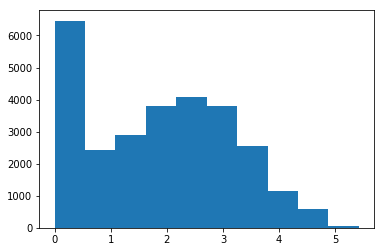

In [28]:
targetArr = np.array(project_data.select('log_rate').collect())
plt.hist(targetArr)
plt.show()

In [31]:
project_data.toPandas().to_csv('project_data.csv')

# Data Mining

In [2]:
df = spark.read.csv('project_data.csv', inferSchema=True, header=True)
df.printSchema() 
print((df.count(), len(df.columns)))

root
 |-- country: integer (nullable = true)
 |-- year: integer (nullable = true)
 |-- sex: integer (nullable = true)
 |-- age: integer (nullable = true)
 |-- suicides/100k pop: double (nullable = true)
 |-- gdp_per_capita ($): integer (nullable = true)
 |-- generation: integer (nullable = true)
 |-- GDP_for_year ($): integer (nullable = true)
 |-- log_rate: double (nullable = true)

(27820, 9)


In [3]:
# Import VectorAssembler and Vectors
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

# Import LinearRegression
from pyspark.ml.regression import LinearRegression

In [4]:
# The input columns are the feature column names, and the output column is what you'd like the new column to be named. 
assembler = VectorAssembler(
    inputCols=["country", "year", 
               "sex","age","gdp_per_capita ($)","generation",
               "GDP_for_year ($)","log_rate"],
    outputCol="features")

In [5]:
# Now that we've created the assembler variable, let's actually transform the data.
output = assembler.transform(df)

# Using print schema, you see that the features output column has been added. 
output.printSchema()

# You can see that the features column is a dense vector that combines the various features as expected.
output.head(1)

root
 |-- country: integer (nullable = true)
 |-- year: integer (nullable = true)
 |-- sex: integer (nullable = true)
 |-- age: integer (nullable = true)
 |-- suicides/100k pop: double (nullable = true)
 |-- gdp_per_capita ($): integer (nullable = true)
 |-- generation: integer (nullable = true)
 |-- GDP_for_year ($): integer (nullable = true)
 |-- log_rate: double (nullable = true)
 |-- features: vector (nullable = true)



[Row(country=0, year=1987, sex=1, age=0, suicides/100k pop=6.71, gdp_per_capita ($)=796, generation=2, GDP_for_year ($)=2138342396, log_rate=2.042518188, features=DenseVector([0.0, 1987.0, 1.0, 0.0, 796.0, 2.0, 2138342396.0, 2.0425]))]

In [6]:
# Let's select two columns (the feature and predictor).
# This is now in the appropriate format to be processed by Spark.
final_df = output.select("features",'suicides/100k pop')
final_df.show()

+--------------------+-----------------+
|            features|suicides/100k pop|
+--------------------+-----------------+
|[0.0,1987.0,1.0,0...|             6.71|
|[0.0,1987.0,1.0,2...|             5.19|
|[0.0,1987.0,0.0,0...|             4.83|
|[0.0,1987.0,1.0,5...|             4.59|
|[0.0,1987.0,1.0,1...|             3.28|
|[0.0,1987.0,0.0,5...|             2.81|
|[0.0,1987.0,0.0,2...|             2.15|
|[0.0,1987.0,0.0,1...|             1.56|
|[0.0,1987.0,1.0,4...|             0.73|
|[0.0,1987.0,0.0,3...|              0.0|
|[0.0,1987.0,0.0,4...|              0.0|
|[0.0,1987.0,1.0,3...|              0.0|
|[0.0,1988.0,0.0,5...|             5.49|
|[0.0,1988.0,1.0,0...|             5.33|
|[0.0,1988.0,1.0,5...|             4.48|
|[0.0,1988.0,1.0,2...|             4.46|
|[0.0,1988.0,1.0,4...|             2.85|
|[0.0,1988.0,0.0,0...|             2.71|
|[0.0,1988.0,0.0,4...|             2.03|
|[0.0,1988.0,0.0,1...|             1.91|
+--------------------+-----------------+
only showing top

In [7]:
final_df.describe().show()

+-------+------------------+
|summary| suicides/100k pop|
+-------+------------------+
|  count|             27820|
|   mean|12.816097411933894|
| stddev| 18.96151101450326|
|    min|               0.0|
|    max|            224.97|
+-------+------------------+



In [8]:
# Let's do a randomised 70/30 split. 
train_data,test_data = final_df.randomSplit([0.7,0.3])

In [11]:
# Let's see our training data.
train_data.describe().show()

# And our testing data.
test_data.describe().show()

+-------+------------------+
|summary| suicides/100k pop|
+-------+------------------+
|  count|             19471|
|   mean|12.817594884700325|
| stddev| 18.93817964408306|
|    min|               0.0|
|    max|            204.92|
+-------+------------------+

+-------+------------------+
|summary| suicides/100k pop|
+-------+------------------+
|  count|              8349|
|   mean|12.812605102407488|
| stddev| 19.01694737340494|
|    min|               0.0|
|    max|            224.97|
+-------+------------------+



# LinearRegression

In [9]:
# Linear Regression
lr = LinearRegression(labelCol='suicides/100k pop')

In [10]:
# Fit the model to the data.
lrModel = lr.fit(train_data)

In [11]:
# Print the coefficients and intercept for linear regression.
print("Coefficients: {} Intercept: {}".format(lrModel.coefficients,lrModel.intercept))

Coefficients: [-0.008291096898284219,-0.0019105163171239158,3.8200100292365677,1.6961333100828477,-4.778971295677082e-05,0.11487546383374471,-5.185187656871731e-10,11.038392194434294] Intercept: -8.53016271828911


In [12]:
lrModel.coefficients

DenseVector([-0.0083, -0.0019, 3.82, 1.6961, -0.0, 0.1149, -0.0, 11.0384])

In [15]:
# Let's evaluate the model against the test data.
test_results = lrModel.evaluate(test_data)

In [31]:
# Residuals show the difference between the predicted value and the test data.
test_results.residuals.show()

+--------------------+
|           residuals|
+--------------------+
|   9.247323188814374|
|   9.496584367711604|
|    2.63251739745271|
| -1.0113250010757948|
|   4.112774964997229|
|   -2.88936369837423|
| -13.728038566535165|
|  1.2128362680658624|
|   7.978614164560934|
| -10.615884847225194|
|  -1.960616823158444|
| -13.620006946767589|
|   3.826404398170714|
|   7.287341727389402|
|   4.012713275661362|
|  -4.397197390311611|
|-0.44783697047832804|
|  -6.543719077667989|
|  1.2714489509369922|
|   5.253554731460785|
+--------------------+
only showing top 20 rows



In [31]:
predictions_lr = lrModel.transform(test_data)
predictions_lr.select("prediction","suicides/100k pop","features").show()

+-------------------+-----------------+--------------------+
|         prediction|suicides/100k pop|            features|
+-------------------+-----------------+--------------------+
|  6.442824795063133|             4.83|[0.0,1987.0,0.0,0...|
|-0.9251186660461012|             1.56|[0.0,1987.0,0.0,1...|
|-6.1453738643304785|              0.0|[0.0,1987.0,0.0,4...|
| 13.486611865530573|             6.71|[0.0,1987.0,1.0,0...|
| 14.498305391975897|             5.19|[0.0,1987.0,1.0,2...|
|  6.130845419493766|             2.03|[0.0,1988.0,0.0,4...|
|  16.29760422822904|             5.49|[0.0,1988.0,0.0,5...|
| -3.935140361367604|              0.0|[0.0,1988.0,1.0,3...|
| -7.818651354000702|              0.0|[0.0,1989.0,0.0,3...|
|-0.4009637973052643|             0.67|[0.0,1989.0,0.0,4...|
|  8.094783407079571|             3.71|[0.0,1989.0,1.0,0...|
| 16.168055617901047|             4.22|[0.0,1989.0,1.0,4...|
| 24.976377254327883|             8.89|[0.0,1989.0,1.0,5...|
| -7.262978914056415|   

In [32]:
# Let's get some evaluation metrics.
print("RSME: {}".format(test_results.rootMeanSquaredError))

RSME: 10.82647924970497


In [17]:
# We can also get the R2 value. 
print("R2: {}".format(test_results.r2))

R2: 0.6758508351046031


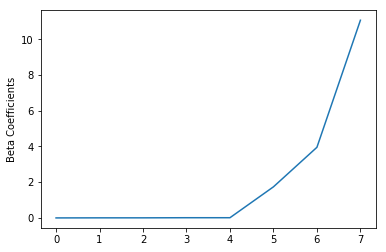

In [13]:
import numpy as np 
import matplotlib.pyplot as plt

beta=np.sort(lrModel.coefficients)
plt.plot(beta)
plt.ylabel('Beta Coefficients')
plt.show()

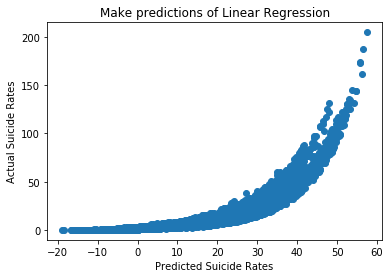

In [32]:
plt.scatter(x=predictions_lr.toPandas()["prediction"],y=predictions_lr.toPandas()["suicides/100k pop"])
plt.title('Make predictions of Linear Regression')
plt.xlabel('Predicted Suicide Rates')
plt.ylabel('Actual Suicide Rates')
plt.show()

# Lasso

In [15]:
# Lasso Regression
lr_lasso = LinearRegression(maxIter=10, regParam=0.3, elasticNetParam=1.0,
                            labelCol='suicides/100k pop')

In [16]:
lr_lassoModel = lr_lasso.fit(train_data)
print("Coefficients(Lasso): {} Intercept(Lasso): {}".format(lr_lassoModel.coefficients,lr_lassoModel.intercept))

Coefficients(Lasso): [-0.00018237712006783613,0.0,3.552327940164116,1.558666721931381,-3.177585930340604e-05,0.0,0.0,10.869940815881243] Intercept(Lasso): -12.433715362394942


In [30]:
# Let's evaluate the model against the test data.
test_results_lasso = lr_lassoModel.evaluate(test_data)

# Residuals show the difference between the predicted value and the test data.
test_results_lasso.residuals.show()

+--------------------+
|           residuals|
+--------------------+
|    9.42333497987254|
|   9.458122660667701|
|  2.2459188733773447|
| -0.9655738143042325|
|   4.312707434456662|
|  -2.460398168801501|
| -12.890573529134802|
|  1.2026972870958976|
|   7.800493988941461|
| -10.124584069691156|
| -1.9481661415592813|
|  -12.78547784781389|
|  3.4483526571176313|
|   7.784851611639469|
|    4.68810438818161|
|  -3.769284351622625|
|-0.41866094627458494|
|  -5.945081489396049|
|   1.975212606308029|
|   4.957279066733749|
+--------------------+
only showing top 20 rows



In [29]:
predictions_lasso = lr_lassoModel.transform(test_data)
predictions_lasso.select("prediction","suicides/100k pop","features").show()

+-------------------+-----------------+--------------------+
|         prediction|suicides/100k pop|            features|
+-------------------+-----------------+--------------------+
|  6.704881500992052|             4.83|[0.0,1987.0,0.0,0...|
|-0.6825189635102635|             1.56|[0.0,1987.0,0.0,1...|
| -6.224342058674929|              0.0|[0.0,1987.0,0.0,4...|
|  13.29537081268466|             6.71|[0.0,1987.0,1.0,0...|
|  14.02584894450975|             5.19|[0.0,1987.0,1.0,2...|
|  5.826525959624512|             2.03|[0.0,1988.0,0.0,4...|
| 15.664825633587903|             5.49|[0.0,1988.0,0.0,5...|
| -4.229822892241003|              0.0|[0.0,1988.0,1.0,3...|
| -7.784184487400536|              0.0|[0.0,1989.0,0.0,3...|
|-0.6511553018635379|             0.67|[0.0,1989.0,0.0,4...|
|  7.937159130016255|             3.71|[0.0,1989.0,1.0,0...|
| 15.289359132832473|             4.22|[0.0,1989.0,1.0,4...|
|  23.79420874180915|             8.89|[0.0,1989.0,1.0,5...|
| -7.765690937285954|   

In [29]:
# Let's get some evaluation metrics.
print("RSME(Lasso): {}".format(test_results_lasso.rootMeanSquaredError))

RSME(Lasso): 10.855242564728986


In [22]:
# We can also get the R2 value. 
print("R2(Lasso): {}".format(test_results_lasso.r2))

R2(Lasso): 0.6741261765889295


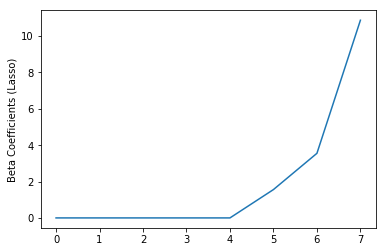

In [17]:
beta_lasso=np.sort(lr_lassoModel.coefficients)
plt.plot(beta_lasso)
plt.ylabel('Beta Coefficients (Lasso)')
plt.show()

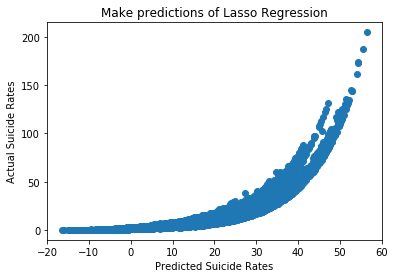

In [30]:
plt.scatter(x=predictions_lasso.toPandas()["prediction"],y=predictions_lasso.toPandas()["suicides/100k pop"])
plt.title('Make predictions of Lasso Regression')
plt.xlabel('Predicted Suicide Rates')
plt.ylabel('Actual Suicide Rates')
plt.show()

# Ridge

In [18]:
# Ridge Regression
lr_ridge = LinearRegression(maxIter=10, regParam=0.3, elasticNetParam=0,
                            labelCol='suicides/100k pop')

In [19]:
lr_ridgeModel = lr_ridge.fit(train_data)
print("Coefficients(Ridge): {} Intercept(Ridge): {}".format(lr_ridgeModel.coefficients,lr_ridgeModel.intercept))

Coefficients(Ridge): [-0.01026911711856584,-0.00823382025045721,4.07500306657117,1.7132847807250944,-4.5011527401363975e-05,-0.01770354510164762,-4.279677569378371e-10,10.878282997930341] Intercept(Ridge): 4.591869570936553


In [27]:
# Let's evaluate the model against the test data.
test_results_ridge = lr_ridgeModel.evaluate(test_data)

# Residuals show the difference between the predicted value and the test data.
test_results_ridge.residuals.show()

+--------------------+
|           residuals|
+--------------------+
|   9.002130929321428|
|   9.244956803274949|
|   2.490635695879759|
| -1.0359208563885587|
|  3.7112590530103935|
|  -3.177288531973477|
| -13.767461015441658|
|  1.1374855102915145|
|   7.711902433640188|
|  -10.49108659474471|
|  -2.216327968602739|
| -13.661334876888883|
|   3.706158804341059|
|   7.082177207498584|
|  3.8069084681573955|
|  -4.518533245260866|
|-0.44166198129529466|
|  -6.690350199483371|
|  0.9708887422011769|
|   5.049282618253475|
+--------------------+
only showing top 20 rows



In [27]:
predictions_ridge = lr_ridgeModel.transform(test_data)
predictions_ridge.select("prediction","suicides/100k pop","features").show()

+--------------------+-----------------+--------------------+
|          prediction|suicides/100k pop|            features|
+--------------------+-----------------+--------------------+
|  6.4234887246442485|             4.83|[0.0,1987.0,0.0,0...|
| -0.7807522879569975|             1.56|[0.0,1987.0,0.0,1...|
|  -5.884266463515883|              0.0|[0.0,1987.0,0.0,4...|
|  13.538984812537151|             6.71|[0.0,1987.0,1.0,0...|
|  14.523756624441276|             5.19|[0.0,1987.0,1.0,2...|
|   6.173255076291972|             2.03|[0.0,1988.0,0.0,4...|
|   16.17252704837342|             5.49|[0.0,1988.0,0.0,5...|
|  -3.541988084250712|              0.0|[0.0,1988.0,1.0,3...|
|   -7.55699557408282|              0.0|[0.0,1989.0,0.0,3...|
|-0.24736671660329268|             0.67|[0.0,1989.0,0.0,4...|
|   8.236096772007706|             3.71|[0.0,1989.0,1.0,0...|
|  16.225330210615756|             4.22|[0.0,1989.0,1.0,4...|
|  24.890128755818832|             8.89|[0.0,1989.0,1.0,5...|
|  -7.05

In [28]:
# Let's get some evaluation metrics.
print("RSME(Ridge): {}".format(test_results_ridge.rootMeanSquaredError))

RSME(Ridge): 10.830757253398243


In [33]:
# We can also get the R2 value. 
print("R2(Ridge): {}".format(test_results_ridge.r2))

R2(Ridge): 0.6755946141731262


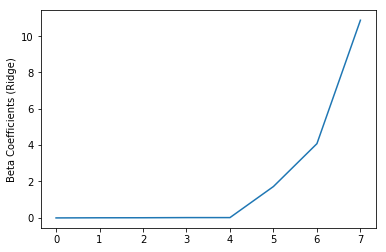

In [20]:
beta_ridge=np.sort(lr_ridgeModel.coefficients)
plt.plot(beta_ridge)
plt.ylabel('Beta Coefficients (Ridge)')
plt.show()

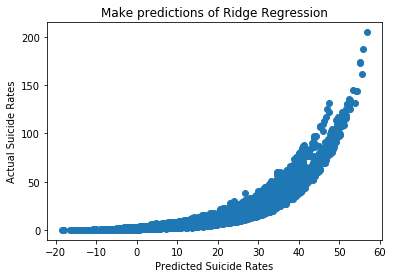

In [28]:
plt.scatter(x=predictions_ridge.toPandas()["prediction"],y=predictions_ridge.toPandas()["suicides/100k pop"])
plt.title('Make predictions of Ridge Regression')
plt.xlabel('Predicted Suicide Rates')
plt.ylabel('Actual Suicide Rates')
plt.show()

# Elastic-Net

In [21]:
# Elastic-Net
lr_ElasticNet = LinearRegression(maxIter=10, regParam=0.3, elasticNetParam=0.8,
                                 labelCol='suicides/100k pop')

In [22]:
lr_ElasticNetModel = lr_ElasticNet.fit(train_data)
print("Coefficients(Elastic-Net): {} Intercept(Elastic-Net): {}".format(lr_ElasticNetModel.coefficients,
                                                            lr_ElasticNetModel.intercept))

Coefficients(Elastic-Net): [-0.002154233463623673,0.0,3.6577988223502347,1.5889422098531245,-3.471862347693554e-05,0.0,-2.39961074891363e-11,10.87197103758242] Intercept(Elastic-Net): -12.394411689718208


In [36]:
# Let's evaluate the model against the test data.
test_results_ElasticNet = lr_ElasticNetModel.evaluate(test_data)

# Residuals show the difference between the predicted value and the test data.
test_results_ElasticNet.residuals.show()

+--------------------+
|           residuals|
+--------------------+
|   9.397365857529433|
|    9.43559652062877|
|   2.243552181927171|
| -0.9979122074514195|
|   4.141296108831181|
| -2.6615079480950112|
| -13.120880749841419|
|  1.1700634542482573|
|   7.737016708721896|
| -10.246837526136934|
|  -2.058559272306492|
| -13.015881701675816|
|    3.47626831078221|
|   7.719826184862992|
|   4.562802913641963|
|  -3.850720442246633|
|-0.39150841654074675|
|   -6.08634663669738|
|  1.8029200188684738|
|   4.924091459404243|
+--------------------+
only showing top 20 rows



In [24]:
predictions_ElasticNet = lr_ElasticNetModel.transform(test_data)
predictions_ElasticNet.select("prediction","suicides/100k pop","features").show()

+-------------------+-----------------+--------------------+
|         prediction|suicides/100k pop|            features|
+-------------------+-----------------+--------------------+
|  6.694110154776606|             4.83|[0.0,1987.0,0.0,0...|
|-0.6646857140424522|             1.56|[0.0,1987.0,0.0,1...|
| -6.117590768576344|              0.0|[0.0,1987.0,0.0,4...|
| 13.390637798032714|             6.71|[0.0,1987.0,1.0,0...|
| 14.181221103324432|             5.19|[0.0,1987.0,1.0,2...|
|  5.935903501705109|             2.03|[0.0,1988.0,0.0,4...|
|  15.80602508327934|             5.49|[0.0,1988.0,0.0,5...|
| -4.047500583784265|              0.0|[0.0,1988.0,1.0,3...|
| -7.703534260199646|              0.0|[0.0,1989.0,0.0,3...|
|-0.5391884410865231|             0.67|[0.0,1989.0,0.0,4...|
|  8.035599985658905|             3.71|[0.0,1989.0,1.0,0...|
| 15.509110666227908|             4.22|[0.0,1989.0,1.0,4...|
| 24.045533129089623|             8.89|[0.0,1989.0,1.0,5...|
| -7.653323535115654|   

In [37]:
# Let's get some evaluation metrics.
print("RSME(Elastic-Net): {}".format(test_results_ElasticNet.rootMeanSquaredError))

RSME(ElasticNet): 10.849751660221997


In [38]:
# We can also get the R2 value. 
print("R2(Elastic-Net): {}".format(test_results_ElasticNet.r2))

R2(Elastic-Net): 0.6744557665513464


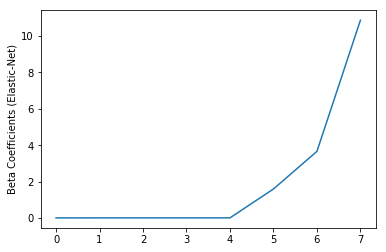

In [23]:
beta_ElasticNet=np.sort(lr_ElasticNetModel.coefficients)
plt.plot(beta_ElasticNet)
plt.ylabel('Beta Coefficients (Elastic-Net)')
plt.show()

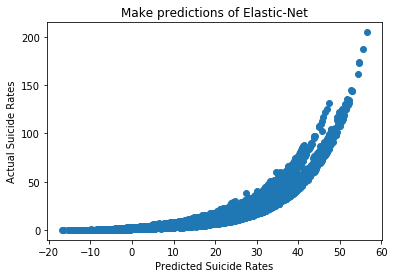

In [26]:
plt.scatter(x=predictions_ElasticNet.toPandas()["prediction"],y=predictions_ElasticNet.toPandas()["suicides/100k pop"])
plt.title('Make predictions of Elastic-Net')
plt.xlabel('Predicted Suicide Rates')
plt.ylabel('Actual Suicide Rates')
plt.show()

# Interpretation 

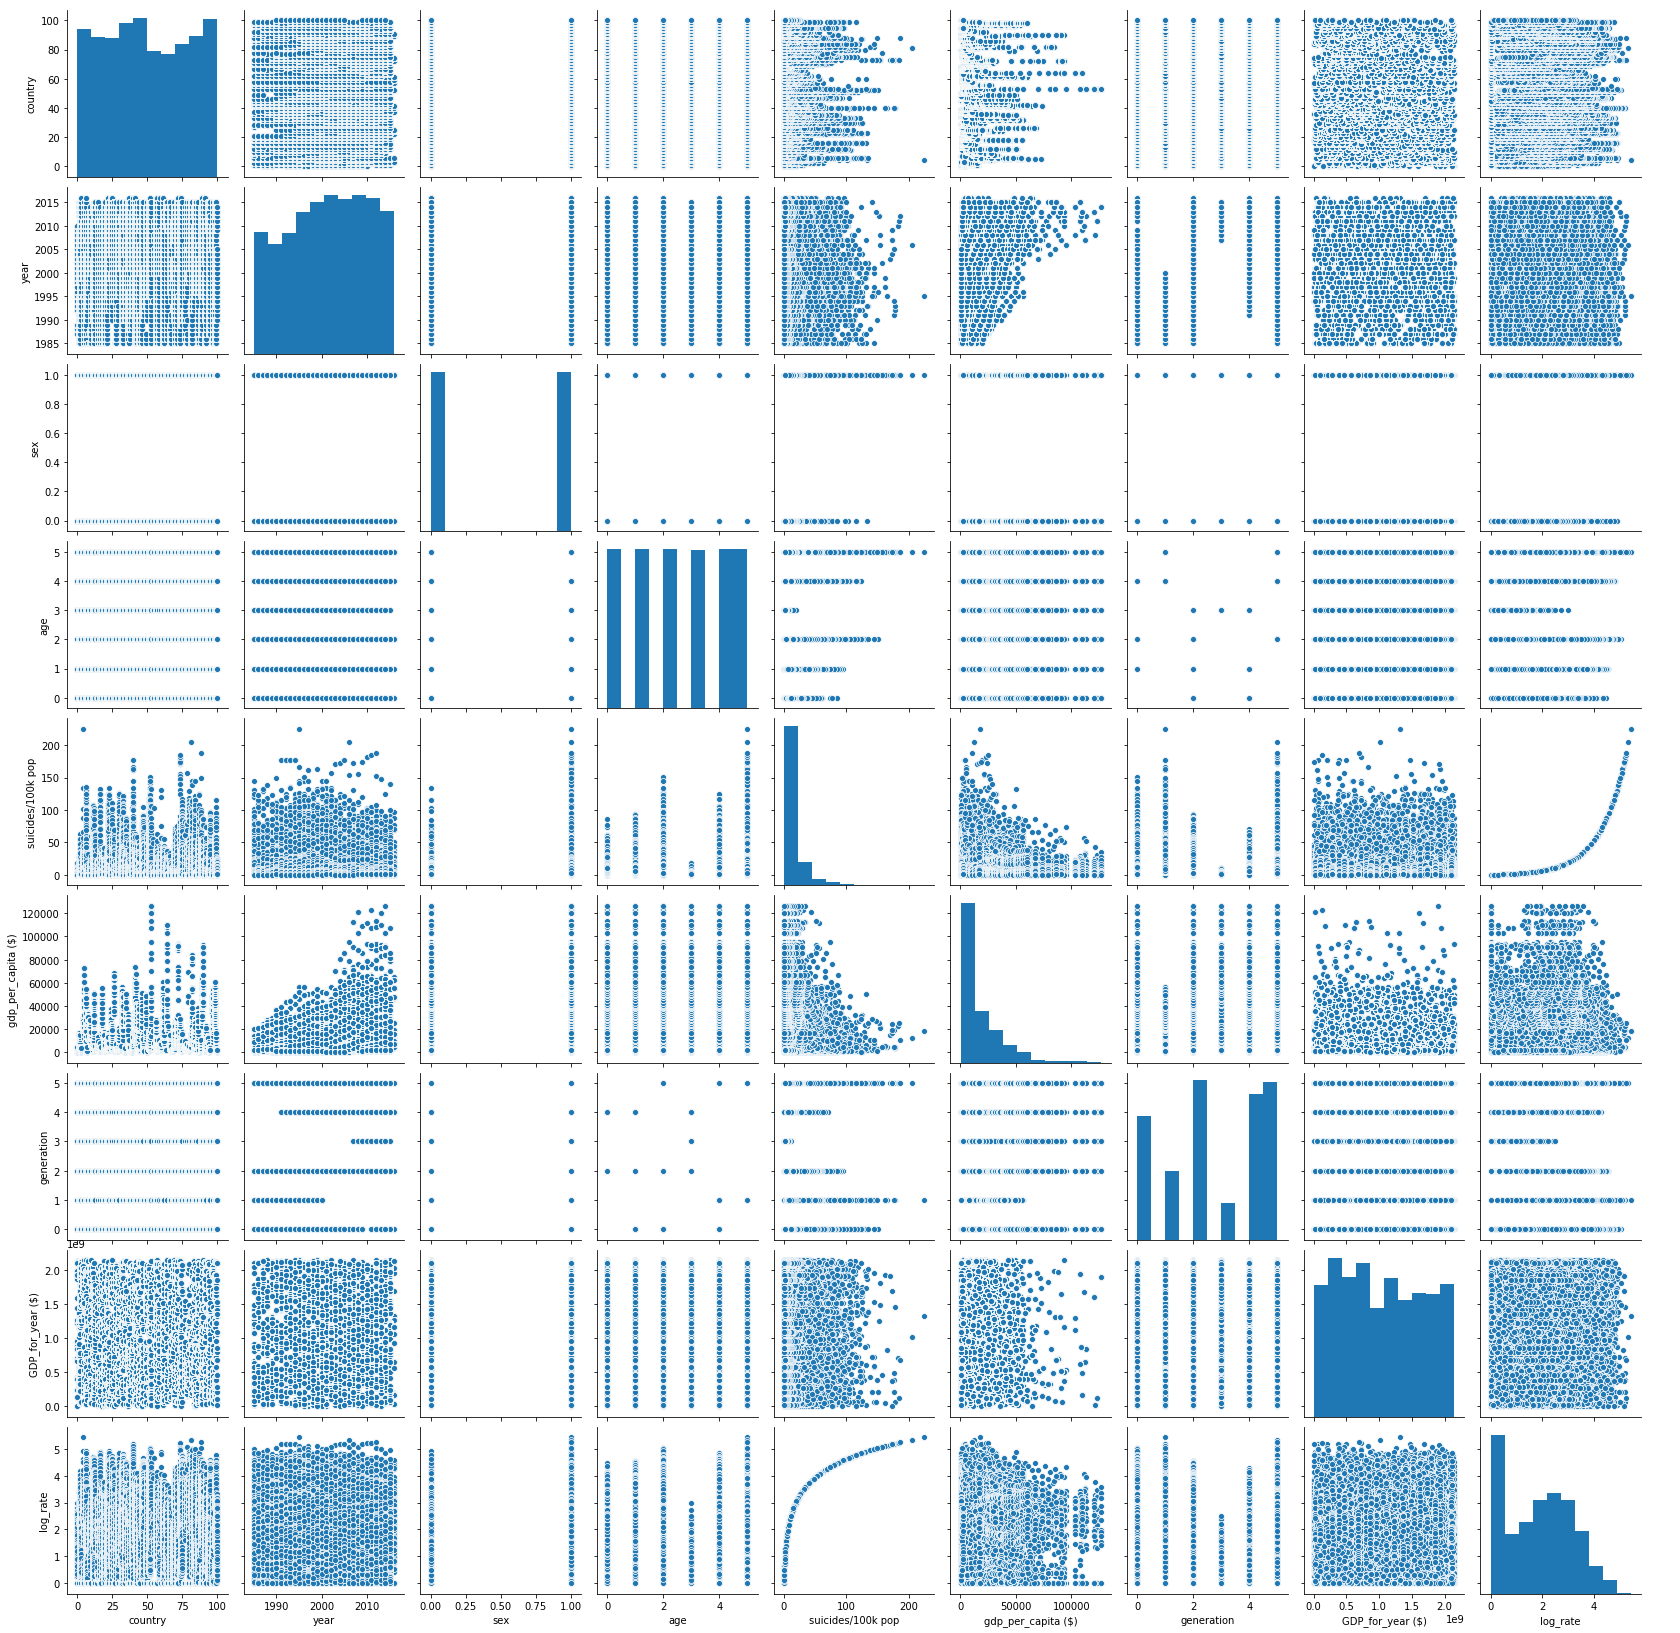

In [37]:
dataset=df.toPandas()
sns.pairplot(dataset)

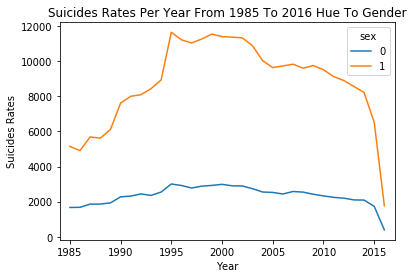

In [38]:
# Polt Total No. Of Suicides Per Year From 1985 To 2016 Hue To Gendar.
dataset.pivot_table('suicides/100k pop', index='year', columns='sex', aggfunc='sum').plot()
plt.title('Suicides Rates Per Year From 1985 To 2016 Hue To Gender')
plt.ylabel('Suicides Rates')
plt.xlabel('Year')
plt.xlim((dataset.year.min() - 1), (dataset.year.max() + 1))
plt.show()

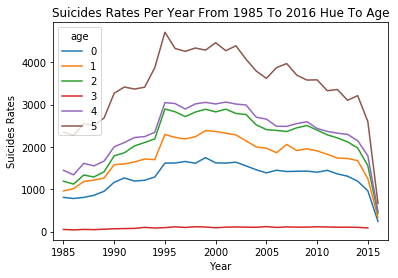

In [42]:
# Polt Total No. Of Suicides Per Year From 1985 To 2016 Hue To Gendar.
dataset.pivot_table('suicides/100k pop', index='year', columns='age', aggfunc='sum').plot()
plt.title('Suicides Rates Per Year From 1985 To 2016 Hue To Age')
plt.ylabel('Suicides Rates')
plt.xlabel('Year')
plt.xlim((dataset.year.min() - 1), (dataset.year.max() + 1))
plt.show()

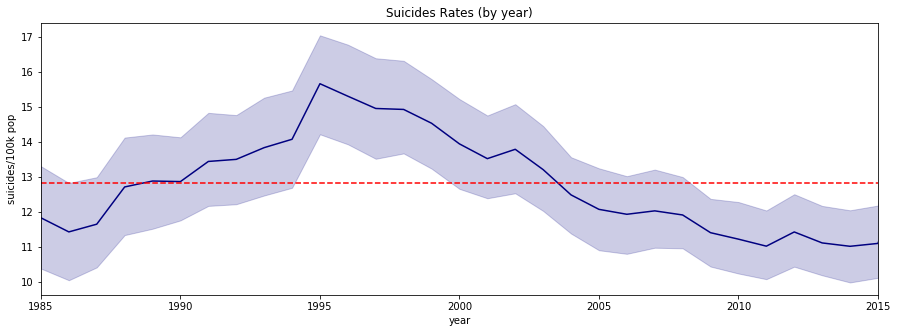

In [39]:
plt.figure(figsize=(15,5))
sns.lineplot(x='year', y='suicides/100k pop', data=dataset, color='navy')
plt.axhline(dataset['suicides/100k pop'].mean(), ls='--', color='red')
plt.title('Suicides Rates (by year)')
plt.xlim(1985,2015)
plt.show()

In [4]:
import six
for i in df.columns:
    if not(isinstance(df.select(i).take(1)[0][0], six.string_types)):
        print("Correlation to log_rate for ", i, df.stat.corr('log_rate',i))

Correlation to log_rate for  country 0.09442794424161374
Correlation to log_rate for  year -0.0260746927858887
Correlation to log_rate for  sex 0.38121150408988386
Correlation to log_rate for  age 0.04249505915479712
Correlation to log_rate for  suicides/100k pop 0.7995447751276518
Correlation to log_rate for  gdp_per_capita ($) 0.06742249634964693
Correlation to log_rate for  generation -0.10979708360987211
Correlation to log_rate for  GDP_for_year ($) 0.02366822857794337
Correlation to log_rate for  log_rate 1.0


In [5]:
assembler = VectorAssembler(
    inputCols=["country","year","sex"
               ,"age","suicides/100k pop","gdp_per_capita ($)"
               ,"generation","GDP_for_year ($)"],
    outputCol="features")

In [6]:
output = assembler.transform(df)

output.printSchema()

output.head(1)

root
 |-- country: integer (nullable = true)
 |-- year: integer (nullable = true)
 |-- sex: integer (nullable = true)
 |-- age: integer (nullable = true)
 |-- suicides/100k pop: double (nullable = true)
 |-- gdp_per_capita ($): integer (nullable = true)
 |-- generation: integer (nullable = true)
 |-- GDP_for_year ($): integer (nullable = true)
 |-- log_rate: double (nullable = true)
 |-- features: vector (nullable = true)



[Row(country=0, year=1987, sex=1, age=0, suicides/100k pop=6.71, gdp_per_capita ($)=796, generation=2, GDP_for_year ($)=2138342396, log_rate=2.042518188, features=DenseVector([0.0, 1987.0, 1.0, 0.0, 6.71, 796.0, 2.0, 2138342396.0]))]

In [7]:
# Let's select two columns (the feature and predictor).
# This is now in the appropriate format to be processed by Spark.
final_df = output.select("features",'log_rate')
final_df.show()

+--------------------+-----------+
|            features|   log_rate|
+--------------------+-----------+
|[0.0,1987.0,1.0,0...|2.042518188|
|[0.0,1987.0,1.0,2...|1.822935087|
|[0.0,1987.0,0.0,0...|   1.763017|
|[0.0,1987.0,1.0,5...|1.720979287|
|[0.0,1987.0,1.0,1...| 1.45395301|
|[0.0,1987.0,0.0,5...|1.337629189|
|[0.0,1987.0,0.0,2...|1.147402453|
|[0.0,1987.0,0.0,1...|0.940007258|
|[0.0,1987.0,1.0,4...|0.548121409|
|[0.0,1987.0,0.0,3...|        0.0|
|[0.0,1987.0,0.0,4...|        0.0|
|[0.0,1987.0,1.0,3...|        0.0|
|[0.0,1988.0,0.0,5...|1.870262531|
|[0.0,1988.0,1.0,0...|1.845300236|
|[0.0,1988.0,1.0,5...|1.701105101|
|[0.0,1988.0,1.0,2...| 1.69744879|
|[0.0,1988.0,1.0,4...|1.348073148|
|[0.0,1988.0,0.0,0...|1.311031877|
|[0.0,1988.0,0.0,4...| 1.10856262|
|[0.0,1988.0,0.0,1...|1.068153081|
+--------------------+-----------+
only showing top 20 rows



In [8]:
final_df.describe().show()

+-------+------------------+
|summary|          log_rate|
+-------+------------------+
|  count|             27820|
|   mean|1.8517335820448595|
| stddev|1.2984852559521718|
|    min|               0.0|
|    max|       5.420402247|
+-------+------------------+



In [9]:
# Let's do a randomised 70/30 split. 
train_data,test_data = final_df.randomSplit([0.7,0.3])

train_data.describe().show()
test_data.describe().show()

+-------+------------------+
|summary|          log_rate|
+-------+------------------+
|  count|             19463|
|   mean|1.8542401592405549|
| stddev|1.3042072405857208|
|    min|               0.0|
|    max|       5.420402247|
+-------+------------------+

+-------+------------------+
|summary|          log_rate|
+-------+------------------+
|  count|              8357|
|   mean|1.8458958996277421|
| stddev|1.2851189334936448|
|    min|               0.0|
|    max|       5.327487744|
+-------+------------------+



In [10]:
# Linear Regression
lr = LinearRegression(labelCol='log_rate')
# Lasso Regression
lr_lasso = LinearRegression(maxIter=10, regParam=0.3, elasticNetParam=1.0,
                            labelCol='log_rate')
# Ridge Regression
lr_ridge = LinearRegression(maxIter=10, regParam=0.3, elasticNetParam=0,
                            labelCol='log_rate')
# Elastic-Net
lr_ElasticNet = LinearRegression(maxIter=10, regParam=0.3, elasticNetParam=0.8,
                                 labelCol='log_rate')
# Fit the model to the data.
lrModel = lr.fit(train_data)
lr_lassoModel = lr_lasso.fit(train_data)
lr_ridgeModel = lr_ridge.fit(train_data)
lr_ElasticNetModel = lr_ElasticNet.fit(train_data)

In [22]:
# Print the coefficients and intercept for linear regression.
print("Coefficients: {} Intercept: {}".format(lrModel.coefficients,lrModel.intercept))
print("\n")
print("Coefficients(Lasso): {} Intercept(Lasso): {}".format(lr_lassoModel.coefficients,lr_lassoModel.intercept))
print("\n")
print("Coefficients(Ridge): {} Intercept(Ridge): {}".format(lr_ridgeModel.coefficients,lr_ridgeModel.intercept))
print("\n")
print("Coefficients(Elastic-Net): {} Intercept(Elastic-Net): {}".format(lr_ElasticNetModel.coefficients,
                                                            lr_ElasticNetModel.intercept))

Coefficients: [0.0023079815902875872,-0.0009237666473090861,0.18488919512743396,-0.0697822501782545,0.053946892300925496,4.970266620212904e-06,-0.0401933996355614,4.354039660170028e-11] Intercept: 2.954551126568259


Coefficients(Lasso): [0.0,0.0,0.0,0.0,0.03933762244340757,0.0,0.0,0.0] Intercept(Lasso): 1.3465801883871753


Coefficients(Ridge): [0.002240640608557863,-0.0008918660069408179,0.2882141947719395,-0.03687251011625225,0.04253335721935768,4.1079148752182185e-06,-0.04291150670153328,3.7058990594298837e-11] Intercept(Ridge): 2.9353819385254662


Coefficients(Elastic-Net): [0.0,0.0,0.0,0.0,0.040630569036641744,0.0,0.0,0.0] Intercept(Elastic-Net): 1.329894451195495


In [12]:
# Let's evaluate the model against the test data.
test_results = lrModel.evaluate(test_data)

# Residuals show the difference between the predicted value and the test data.
test_results.residuals.show()

+--------------------+
|           residuals|
+--------------------+
| -1.0175479232127103|
| -0.9743145014947363|
| -0.9963388250269736|
| -0.2904550503980533|
|  0.3599447382176142|
|  0.4825056127782146|
| -1.1112430519084118|
|0.030730548211660214|
|-0.17959528304046768|
|-0.07039892153394356|
|  0.7487066928707986|
| 0.11426566023955353|
| -0.2342778474036582|
| 0.23534900271083137|
|-0.41065020002527663|
|-0.24139270520082756|
| -0.7764249998506854|
|-0.06732778893451075|
| 0.39808508893380035|
| 0.22820345625100935|
+--------------------+
only showing top 20 rows



In [13]:
# Let's evaluate the model against the test data.
test_results_lasso = lr_lassoModel.evaluate(test_data)

# Residuals show the difference between the predicted value and the test data.
test_results_lasso.residuals.show()

+--------------------+
|           residuals|
+--------------------+
| -1.3465801883871753|
| -1.3465801883871753|
| -1.3465801883871753|
| -0.4679396213988912|
| 0.43198255301755983|
|  0.2721926381315394|
| -1.3465801883871753|
| -0.1421532682088098|
|-0.35356196625408387|
|   -0.52241948803238|
|  0.3077187953985172|
|-0.11061926435088676|
|-0.43019554586766606|
|-0.20961034992465577|
| -0.8601127694242584|
| -0.4892958900522866|
| -1.3465801883871753|
|-0.11061926435088676|
|-0.05142953963504...|
|0.021641910836464273|
+--------------------+
only showing top 20 rows



In [14]:
# Let's evaluate the model against the test data.
test_results_ridge = lr_ridgeModel.evaluate(test_data)

# Residuals show the difference between the predicted value and the test data.
test_results_ridge.residuals.show()

+--------------------+
|           residuals|
+--------------------+
| -1.1190546180572276|
| -1.0028657493962976|
|  -1.021153611483599|
| -0.3352311628614352|
|  0.3089692859737476|
|  0.3565164282842759|
| -1.3375325447356055|
| 0.03729077506896461|
|-0.22051183844236344|
|-0.13634144920876623|
|  0.6197297398788784|
|-0.11525828495020907|
| -0.2406413426229781|
|  0.1799946352274142|
| -0.5627842976401446|
|-0.29674432968337805|
| -0.9038439788157042|
|-0.21059614070145027|
| 0.17287384213355272|
| 0.23762886502386205|
+--------------------+
only showing top 20 rows



In [15]:
# Let's evaluate the model against the test data.
test_results_ElasticNet = lr_ElasticNetModel.evaluate(test_data)

# Residuals show the difference between the predicted value and the test data.
test_results_ElasticNet.residuals.show()

+--------------------+
|           residuals|
+--------------------+
|  -1.329894451195495|
|  -1.329894451195495|
|  -1.329894451195495|
| -0.4532708808926563|
|  0.4399926185686387|
|  0.2821679825043344|
|  -1.329894451195495|
|-0.12897141628479414|
|  -0.339345757055481|
|   -0.50755680553716|
|  0.3173062557933417|
| -0.0976184249499239|
| -0.4156690294866867|
| -0.1960664729545345|
| -0.8442933064500452|
| -0.4745495727504576|
|  -1.329894451195495|
| -0.0976184249499239|
|-0.03879072528018379|
| 0.03378940548589249|
+--------------------+
only showing top 20 rows



In [19]:
print("RSME: {}".format(test_results.rootMeanSquaredError))
print("R2: {}".format(test_results.r2))

RSME: 0.7540020951306231
R2: 0.6557210798941326


In [18]:
print("RSME(Lasso): {}".format(test_results_lasso.rootMeanSquaredError))
print("R2(Lasso): {}".format(test_results_lasso.r2))

RSME(Lasso): 0.8296260524142132
R2(Lasso): 0.5831977162239916


In [17]:
print("RSME(Ridge): {}".format(test_results_ridge.rootMeanSquaredError))
print("R2(Ridge): {}".format(test_results_ridge.r2))

RSME(Ridge): 0.7734091592438915
R2(Ridge): 0.637770389615888


In [16]:
print("RSME(Elastic-Net): {}".format(test_results_ElasticNet.rootMeanSquaredError))
print("R2(Elastic-Net): {}".format(test_results_ElasticNet.r2))

RSME(Elastic-Net): 0.8218586347537178
R2(Elastic-Net): 0.5909658471404067


In [23]:
predictions_lr = lrModel.transform(test_data)
predictions_lr.select("prediction","log_rate","features").show()

+------------------+-----------+--------------------+
|        prediction|   log_rate|            features|
+------------------+-----------+--------------------+
|1.0175479232127103|        0.0|(8,[1,3,5,7],[200...|
|0.9743145014947363|        0.0|(8,[1,5,6,7],[200...|
|0.9963388250269736|        0.0|(8,[1,5,6,7],[200...|
|1.2304623083980533|0.940007258|[0.0,1987.0,0.0,1...|
|1.6825734497823857|2.042518188|[0.0,1987.0,1.0,0...|
|1.3404294742217855|1.822935087|[0.0,1987.0,1.0,2...|
|1.1112430519084118|        0.0|[0.0,1987.0,1.0,3...|
|1.2803013287883398|1.311031877|[0.0,1988.0,0.0,0...|
|1.2477483640404676|1.068153081|[0.0,1988.0,0.0,1...|
|0.9500256695339435|0.879626748|[0.0,1988.0,0.0,2...|
|1.1215558381292015|1.870262531|[0.0,1988.0,0.0,5...|
|1.2338074877604466|1.348073148|[0.0,1988.0,1.0,4...|
|1.2163563194036582|0.982078472|[0.0,1989.0,0.0,0...|
|0.9972112582891686|1.232560261|[0.0,1989.0,0.0,2...|
|0.9234738260252766|0.512823626|[0.0,1989.0,0.0,4...|
|1.1576834372008276|0.916290

In [26]:
predictions_lasso = lr_lassoModel.transform(test_data)
predictions_lasso.select("prediction","log_rate","features").show()

+------------------+-----------+--------------------+
|        prediction|   log_rate|            features|
+------------------+-----------+--------------------+
|1.3465801883871753|        0.0|(8,[1,3,5,7],[200...|
|1.3465801883871753|        0.0|(8,[1,5,6,7],[200...|
|1.3465801883871753|        0.0|(8,[1,5,6,7],[200...|
|1.4079468793988912|0.940007258|[0.0,1987.0,0.0,1...|
|  1.61053563498244|2.042518188|[0.0,1987.0,1.0,0...|
|1.5507424488684607|1.822935087|[0.0,1987.0,1.0,2...|
|1.3465801883871753|        0.0|[0.0,1987.0,1.0,3...|
|1.4531851452088098|1.311031877|[0.0,1988.0,0.0,0...|
|1.4217150472540838|1.068153081|[0.0,1988.0,0.0,1...|
|  1.40204623603238|0.879626748|[0.0,1988.0,0.0,2...|
|1.5625437356014829|1.870262531|[0.0,1988.0,0.0,5...|
|1.4586924123508869|1.348073148|[0.0,1988.0,1.0,4...|
| 1.412274017867666|0.982078472|[0.0,1989.0,0.0,0...|
|1.4421706109246557|1.232560261|[0.0,1989.0,0.0,2...|
|1.3729363954242584|0.512823626|[0.0,1989.0,0.0,4...|
|1.4055866220522866|0.916290

In [25]:
predictions_ridge = lr_ridgeModel.transform(test_data)
predictions_ridge.select("prediction","log_rate","features").show()

+------------------+-----------+--------------------+
|        prediction|   log_rate|            features|
+------------------+-----------+--------------------+
|1.1190546180572276|        0.0|(8,[1,3,5,7],[200...|
|1.0028657493962976|        0.0|(8,[1,5,6,7],[200...|
| 1.021153611483599|        0.0|(8,[1,5,6,7],[200...|
|1.2752384208614351|0.940007258|[0.0,1987.0,0.0,1...|
|1.7335489020262522|2.042518188|[0.0,1987.0,1.0,0...|
|1.4664186587157242|1.822935087|[0.0,1987.0,1.0,2...|
|1.3375325447356055|        0.0|[0.0,1987.0,1.0,3...|
|1.2737411019310354|1.311031877|[0.0,1988.0,0.0,0...|
|1.2886649194423634|1.068153081|[0.0,1988.0,0.0,1...|
|1.0159681972087662|0.879626748|[0.0,1988.0,0.0,2...|
|1.2505327911211217|1.870262531|[0.0,1988.0,0.0,5...|
|1.4633314329502092|1.348073148|[0.0,1988.0,1.0,4...|
| 1.222719814622978|0.982078472|[0.0,1989.0,0.0,0...|
|1.0525656257725857|1.232560261|[0.0,1989.0,0.0,2...|
|1.0756079236401446|0.512823626|[0.0,1989.0,0.0,4...|
| 1.213035061683378|0.916290

In [24]:
predictions_ElasticNet = lr_ElasticNetModel.transform(test_data)
predictions_ElasticNet.select("prediction","log_rate","features").show()

+------------------+-----------+--------------------+
|        prediction|   log_rate|            features|
+------------------+-----------+--------------------+
| 1.329894451195495|        0.0|(8,[1,3,5,7],[200...|
| 1.329894451195495|        0.0|(8,[1,5,6,7],[200...|
| 1.329894451195495|        0.0|(8,[1,5,6,7],[200...|
|1.3932781388926563|0.940007258|[0.0,1987.0,0.0,1...|
|1.6025255694313612|2.042518188|[0.0,1987.0,1.0,0...|
|1.5407671044956657|1.822935087|[0.0,1987.0,1.0,2...|
| 1.329894451195495|        0.0|[0.0,1987.0,1.0,3...|
|1.4400032932847942|1.311031877|[0.0,1988.0,0.0,0...|
| 1.407498838055481|1.068153081|[0.0,1988.0,0.0,1...|
|  1.38718355353716|0.879626748|[0.0,1988.0,0.0,2...|
|1.5529562752066584|1.870262531|[0.0,1988.0,0.0,5...|
| 1.445691572949924|1.348073148|[0.0,1988.0,1.0,4...|
|1.3977475014866867|0.982078472|[0.0,1989.0,0.0,0...|
|1.4286267339545344|1.232560261|[0.0,1989.0,0.0,2...|
|1.3571169324500452|0.512823626|[0.0,1989.0,0.0,4...|
|1.3908403047504576|0.916290

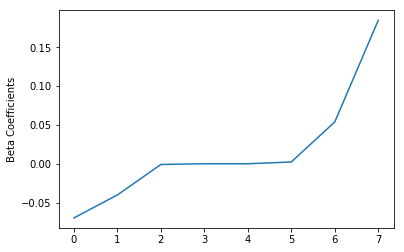

In [31]:
import numpy as np 
import matplotlib.pyplot as plt

beta=np.sort(lrModel.coefficients)
plt.plot(beta)
plt.ylabel('Beta Coefficients')
plt.show()

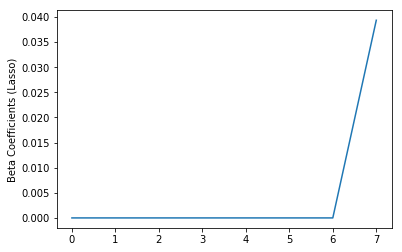

In [28]:
beta_lasso=np.sort(lr_lassoModel.coefficients)
plt.plot(beta_lasso)
plt.ylabel('Beta Coefficients (Lasso)')
plt.show()

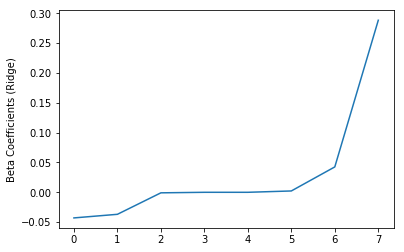

In [29]:
beta_ridge=np.sort(lr_ridgeModel.coefficients)
plt.plot(beta_ridge)
plt.ylabel('Beta Coefficients (Ridge)')
plt.show()

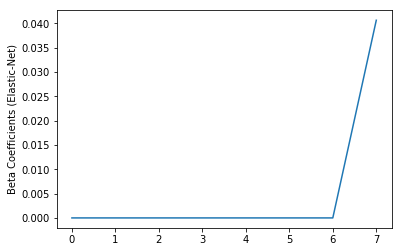

In [30]:
beta_ElasticNet=np.sort(lr_ElasticNetModel.coefficients)
plt.plot(beta_ElasticNet)
plt.ylabel('Beta Coefficients (Elastic-Net)')
plt.show()

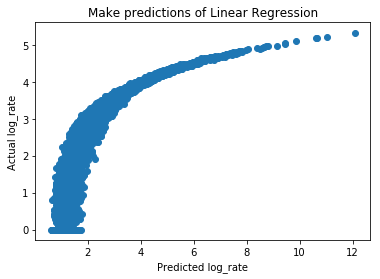

In [33]:
plt.scatter(x=predictions_lr.toPandas()["prediction"],y=predictions_lr.toPandas()["log_rate"])
plt.title('Make predictions of Linear Regression')
plt.xlabel('Predicted log_rate')
plt.ylabel('Actual log_rate')
plt.show()

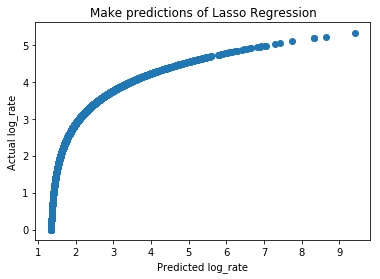

In [34]:
plt.scatter(x=predictions_lasso.toPandas()["prediction"],y=predictions_lasso.toPandas()["log_rate"])
plt.title('Make predictions of Lasso Regression')
plt.xlabel('Predicted log_rate')
plt.ylabel('Actual log_rate')
plt.show()

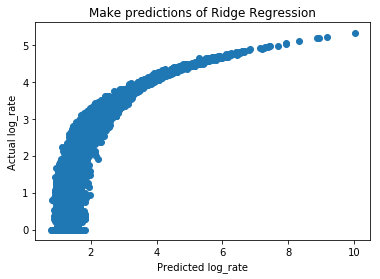

In [35]:
plt.scatter(x=predictions_ridge.toPandas()["prediction"],y=predictions_ridge.toPandas()["log_rate"])
plt.title('Make predictions of Ridge Regression')
plt.xlabel('Predicted log_rate')
plt.ylabel('Actual log_rate')
plt.show()

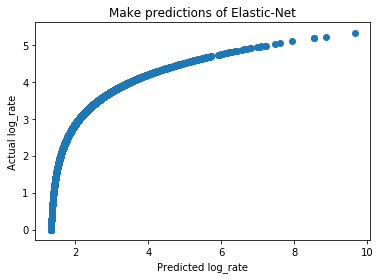

In [32]:
plt.scatter(x=predictions_ElasticNet.toPandas()["prediction"],y=predictions_ElasticNet.toPandas()["log_rate"])
plt.title('Make predictions of Elastic-Net')
plt.xlabel('Predicted log_rate')
plt.ylabel('Actual log_rate')
plt.show()